We work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. 

You need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.


Data description

—Name                                                                                                          
—Platform                                                                                                     
—Year_of_Release                                                                                                   
—Genre                                                                                                   
—NA_sales (North American sales in USD million)                                                                     
—EU_sales (sales in Europe in USD million)                                                                    
—JP_sales (sales in Japan in USD million)                                                                    
—Other_sales (sales in other countries in USD million)                                                             
—Critic_Score (maximum of 100)                                                                    
—User_Score (maximum of 10)                                                                    
—Rating (ESRB)

## Open the data file and study the general information

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mt
from functools import reduce

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
games.duplicated().value_counts()

False    16715
dtype: int64

In [7]:
games.isna().sum()/len(games)*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

The data consists of 11 columns and 16715 rows. There are no duplicated values but a substantial amount of missing values were found in the following columns: Name, Year_of_Release, Genre, Critic_score, User_Score and Rating. User_score and Rating are missing 40% of data and critic_score is missing 50% which is too large to drop and not disrupt our data. Name is missing 0.0120%, year_of_release is missing 1.609% and Genre is missing 0.0120% of data. The columns in this data will be changed to lowercase.

##  Prepare the data

In [8]:
games.columns=  games.columns.str.lower()

In [9]:
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [10]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


The values missing in name are the same ones missing in genre. The games are old and sales are low and the amount of data missing is less than 1% and can be deleted w/out affecting our analysis.

In [12]:
games.dropna(subset=['name','genre'], inplace=True)

In [13]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

year_of_release datatype will be converted to datetime as years are not floats. Before doing so, I'll fill in the missing values by grouping the platform & genre of the games.

In [14]:
games['year_of_release'] = games.groupby(['platform','genre'])['year_of_release'].apply(lambda x: x.fillna(x.median()))

In [15]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y').dt.year

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [17]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Looking at the unique values of the user_score column we see that they are missing values and 'tbd' values which means those scores were not available when data was extracted. There is not much of a difference between nan and tbd therefore I'll convert tbd values to nan. I won't convert nan values to 0 because we have games that have been rated a 0 by users. We will aslo be converting the datatype from object to float.

In [18]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [19]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [20]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Looking at the unique values of the critic_score column we can change its dtype to integer and we'll have to adress the missing values. I assume we have missing data because there was poor or no documentation in the past but for early 2000s to now I cant say the same. This may have been an error or the information was not entered. We'll be using the methods used to fill years on critic_score.

In [21]:
games['critic_score'] = games.groupby(['platform','genre'])['critic_score'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [22]:
games.corr(method='pearson')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.093215,0.004556,-0.165711,0.038149,-0.028207,-0.266230
na_sales,-0.093215,1.000000,0.765341,0.449668,0.638695,0.212003,0.086200
eu_sales,0.004556,0.765341,1.000000,0.435079,0.722796,0.198388,0.055337
jp_sales,-0.165711,0.449668,0.435079,1.000000,0.291090,0.127028,0.125598
other_sales,0.038149,0.638695,0.722796,0.291090,1.000000,0.182552,0.057119
critic_score,-0.028207,0.212003,0.198388,0.127028,0.182552,1.000000,0.537769
user_score,-0.266230,0.086200,0.055337,0.125598,0.057119,0.537769,1.000000


In [23]:
games['user_score'] = games.groupby(['critic_score'])['user_score'].apply(lambda x: x.fillna(x.median()))

In [24]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16207,Rock N' Roll Racing,SNES,1993,Racing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16553,Farming Simulator 2014,PSV,2014,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16693,PGA European Tour,N64,2000,Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16694,Carmageddon 64,N64,1999,Action,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [25]:
games.isna().sum()/len(games) * 100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score        6.773171
user_score          6.773171
rating             40.471489
dtype: float64

It seems we are still missing data on both critic_score and user_score, I wanted to see if the missing data was associated to games release before the 2000's but as shown above we have data current data missing which can only mean that it was not updated. I'll fill in the rest of that data with a 0.

In [26]:
games['critic_score']= games['critic_score'].fillna('0')
games['user_score']= games['user_score'].fillna('0')

In [27]:
games['rating'].value_counts(dropna=False)

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [28]:
rating_by_genre = games.pivot_table(index=['genre','rating'], values='year_of_release', aggfunc='median').reset_index()
print(rating_by_genre)

           genre rating  year_of_release
0         Action     AO           2005.0
1         Action      E           2007.0
2         Action   E10+           2009.0
3         Action     EC           2011.0
4         Action      M           2009.0
5         Action      T           2008.0
6      Adventure      E           2008.0
7      Adventure   E10+           2010.0
8      Adventure     EC           2005.0
9      Adventure      M           2009.0
10     Adventure      T           2008.0
11      Fighting      E           2001.5
12      Fighting   E10+           2009.0
13      Fighting      M           2006.0
14      Fighting      T           2007.0
15          Misc      E           2008.0
16          Misc   E10+           2010.0
17          Misc     EC           2010.0
18          Misc    K-A           1996.0
19          Misc      M           2006.0
20          Misc      T           2009.0
21      Platform      E           2004.0
22      Platform   E10+           2009.0
23      Platform

In [29]:
rating_by_name = games.pivot_table(index=['name','rating'], values='year_of_release', aggfunc='median').reset_index()
print(rating_by_name)

                              name rating  year_of_release
0                Tales of Xillia 2      T           2012.0
1          .hack//Infection Part 1      T           2002.0
2           .hack//Mutation Part 2      T           2002.0
3           .hack//Outbreak Part 3      T           2002.0
4                       007 Racing      T           2000.0
...                            ...    ...              ...
6241                    thinkSMART      E           2010.0
6242            thinkSMART FAMILY!      E           2010.0
6243    thinkSMART: Chess for Kids      E           2011.0
6244                  uDraw Studio      E           2010.0
6245  uDraw Studio: Instant Artist      E           2011.0

[6246 rows x 3 columns]


In [30]:
sorted(games['name'].unique())

[' Beyblade Burst',
 ' Fire Emblem Fates',
 " Frozen: Olaf's Quest",
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 "'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Ri

In [31]:
games[games['name']== "FIFA 14"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
1753,FIFA 14,XOne,2013,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
4699,FIFA 14,PSV,2013,Sports,0.08,0.23,0.01,0.09,75.5,1.8,E
4809,FIFA 14,PC,2013,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E
4985,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,66.0,4.3,E
6871,FIFA 14,3DS,2013,Sports,0.00,0.22,0.00,0.01,58.0,6.85,NaN
7875,FIFA 14,PSP,2013,Sports,0.00,0.15,0.00,0.04,73.0,3.4,E


Rating is a difficult to fill. We can't fill in those missing values by genre because not every genre type have the same rating. Grouping by name and genre filling it with the mode did not work either. Filling it with the mode of name column worked to fill in all the missing value but it wouldn't be accurate data, some of these games should not be rated an E. For now I have decided to fill in that data with unknown.


In [32]:
games['rating']= games['rating'].fillna('unknown')

In [33]:
games.isna().sum()/len(games) * 100

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

In [34]:
## Calculate the total sales (the sum of sales in all regions) 

In [35]:
games['total_sales']= games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [36]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,unknown,31.38


## Analyze the data

In [37]:
## Lets see how many games were released in different years

In [38]:
yearly_release= games.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
print(yearly_release)

    year_of_release  name
0              1980    10
1              1981    50
2              1982    47
3              1983    18
4              1984    14
5              1985    14
6              1986    21
7              1987    16
8              1988    15
9              1989    17
10             1990    16
11             1991    41
12             1992    43
13             1993    60
14             1994   121
15             1995   220
16             1996   263
17             1997   289
18             1998   387
19             1999   339
20             2000   351
21             2001   482
22             2002   830
23             2003   804
24             2004   797
25             2005   950
26             2006  1010
27             2007  1200
28             2008  1471
29             2009  1466
30             2010  1299
31             2011  1155
32             2012   658
33             2013   548
34             2014   583
35             2015   606
36             2016   502


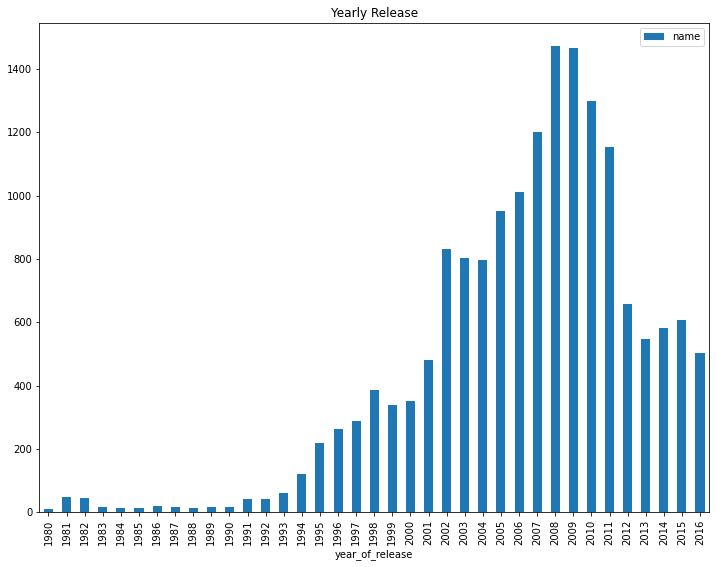

In [39]:
yearly_release.plot(x='year_of_release', y='name', figsize=( 12, 9), kind='bar', title='Yearly Release');

From 1980-1993 very few games were released. It looks likes like there was an uptick in 1994 with releases growing each year and reaching its peak in 2006-2011. From 2012-2016 games released dropped to 1/2 of its peak.

In [40]:
## Platform Sales

In [41]:
sales_by_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', inplace=False).reset_index()
print(sales_by_platform)

   platform  total_sales
0      PCFX         0.03
1        GG         0.04
2       3DO         0.10
3      TG16         0.16
4        WS         1.42
5        NG         1.44
6       SCD         1.86
7        DC        15.95
8       GEN        28.35
9       SAT        33.59
10      PSV        54.07
11     WiiU        82.19
12     2600        96.98
13     XOne       159.32
14       GC       198.93
15     SNES       200.04
16      N64       218.68
17      NES       251.05
18       GB       255.46
19       XB       257.74
20      3DS       259.00
21       PC       259.52
22      PSP       294.05
23      PS4       314.14
24      GBA       317.85
25       PS       730.86
26       DS       806.12
27      Wii       907.51
28      PS3       939.65
29     X360       971.42
30      PS2      1255.77


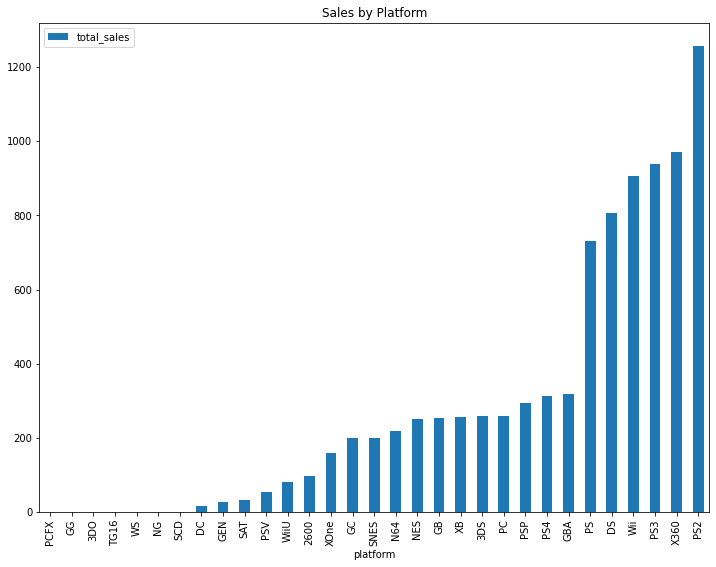

In [42]:
sales_by_platform.plot(x='platform',y='total_sales', figsize=( 12, 9), kind='bar', title='Sales by Platform');

The platforms with the greatest total sales are                                                                                  -PS                                                                                                                            -DS
-Wii                                                                                                                           -PS3
-X360                                                                                                                          -PS2

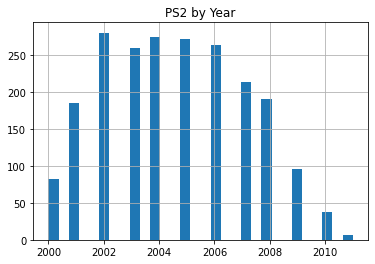

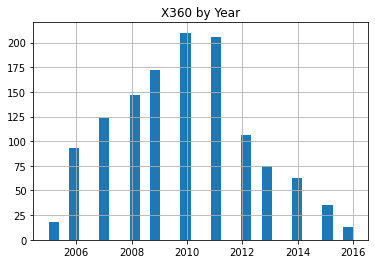

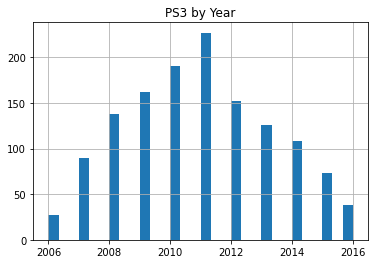

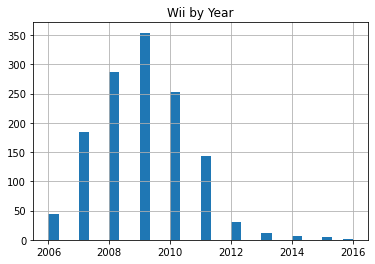

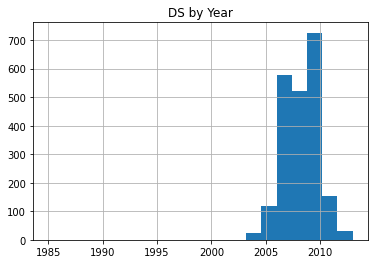

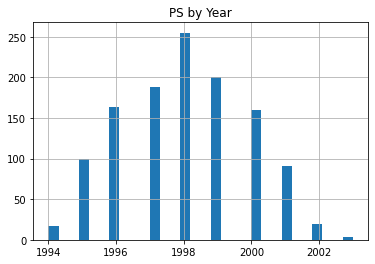

In [43]:
ps2_platform = games[games['platform']=='PS2']

ps2_platform.hist('year_of_release', bins=30)
plt.title('PS2 by Year')
plt.show()

x360_platform = games[games['platform']=='X360']

x360_platform.hist('year_of_release', bins=30)
plt.title('X360 by Year')
plt.show()

ps3_platform = games[games['platform']=='PS3']

ps3_platform.hist('year_of_release', bins=30)
plt.title('PS3 by Year')
plt.show()

wii_platform = games[games['platform']=='Wii']

wii_platform.hist('year_of_release', bins=30)
plt.title('Wii by Year')
plt.show()

ds_platform = games[games['platform']=='DS']

ds_platform.hist('year_of_release', bins=20)
plt.title('DS by Year')
plt.show()

ps_platform = games[games['platform']=='PS']

ps_platform.hist('year_of_release', bins=30)
plt.title('PS by Year')
plt.show()

In [44]:
games_clean = games.query('year_of_release > 2005').reset_index()

In [45]:
games_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10498 entries, 0 to 10497
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            10498 non-null  int64  
 1   name             10498 non-null  object 
 2   platform         10498 non-null  object 
 3   year_of_release  10498 non-null  int64  
 4   genre            10498 non-null  object 
 5   na_sales         10498 non-null  float64
 6   eu_sales         10498 non-null  float64
 7   jp_sales         10498 non-null  float64
 8   other_sales      10498 non-null  float64
 9   critic_score     10498 non-null  object 
 10  user_score       10498 non-null  object 
 11  rating           10498 non-null  object 
 12  total_sales      10498 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.0+ MB


In [46]:
games_clean['user_score'] = pd.to_numeric(games_clean['user_score'], errors='coerce')
games_clean['critic_score'] = pd.to_numeric(games_clean['critic_score'], errors='coerce')

In [47]:
platform_popularity = pd.pivot_table(
    games_clean, 
    index='platform', 
    columns='year_of_release',
    values='total_sales', 
    aggfunc='sum'
)
print(platform_popularity)

year_of_release    2006    2007    2008    2009    2010    2011    2012  \
platform                                                                  
3DS                 NaN     NaN     NaN     NaN     NaN   63.38   51.36   
DC                  NaN    0.02    0.04     NaN     NaN     NaN     NaN   
DS               119.81  146.97  148.62  119.54   85.02   26.18   11.01   
GBA                5.28    3.40     NaN     NaN     NaN     NaN     NaN   
GC                11.26    0.27     NaN     NaN     NaN     NaN     NaN   
PC                 2.85    9.28   12.52   17.04   26.82   35.88   23.36   
PS2              105.88   75.99   53.90   26.40    5.64    0.45     NaN   
PS3               20.96   73.19  118.52  130.93  146.03  161.14  107.45   
PS4                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
PSP               55.32   46.93   36.61   40.24   35.04   17.82    7.69   
PSV                 NaN     NaN     NaN     NaN     NaN    4.63   16.19   
Wii              137.15  

It seems the top popular platform lose their popularity after 8 years. I will be taking data after 2005 as this will take into account newly released platforms. 10 years of data is sufficient enough to note the rise and fall of data provided.                  
PS2: was popular between 2001-2006. In 2007, sales began to decrease and hitting below 1 sale in 2011 and has not bounce back since then.                                                                                                                                                                                                                                                     X360: popularity began to climb in 2006 and lasted until 2011. In 2012, sales began to decrease with its lowest sale of 1.52 in 2016.
PS3: rose in popularity in 2008-2013. Sales dropped by in 2014.
Wii: was popular in 2006-2010, sales began to dropin 2012 and hit zero sales in 2016.
DS: was a new platform released in the mid 2000's and was popular in 2006-2009. In 2010, popularity dropped and sales dropped to zero in 2014.
PS: one the top sales platform lost popularity well before 2005. The platform was popluar in 1996-1999 and sales began to decrease in 2000.

In [48]:
global_sales= games_clean.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
global_sales= global_sales.sort_values(by='total_sales', inplace=False)
print(global_sales)

   platform  year_of_release  total_sales
6        DC             2007         0.02
7        DC             2008         0.04
61      PSP             2015         0.12
78      Wii             2016         0.18
97       XB             2008         0.18
..      ...              ...          ...
69      Wii             2007       152.77
42      PS3             2011       161.14
70      Wii             2008       171.73
88     X360             2010       179.72
71      Wii             2009       222.89

[102 rows x 3 columns]


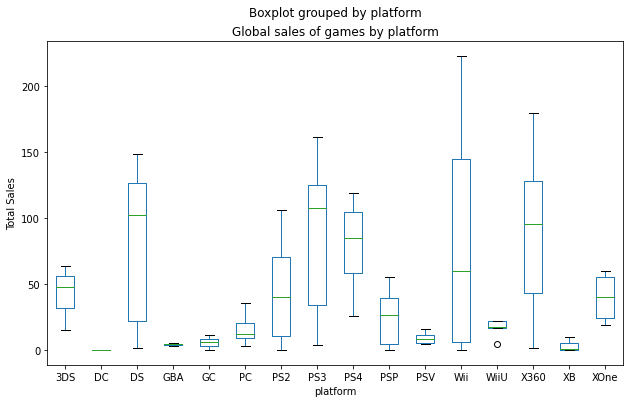

In [49]:
global_sales.boxplot(by ='platform', column =['total_sales'], grid = False, figsize=(10,6));
plt.title('Global sales of games by platform')
plt.ylabel('Total Sales');

In [50]:
global_sales.pivot_table(index='platform', values='total_sales', aggfunc=['median', 'mean'])

,median,mean
,total_sales,total_sales
platform,,
3DS,47.605,43.166667
DC,0.030,0.030000
DS,102.280,82.336250
GBA,4.340,4.340000
GC,5.765,5.765000
PC,12.520,15.198182
PS2,40.150,44.710000
PS3,107.450,85.422727


There is a very much a difference in sales games sold by platform. When looking at the boxplot from the extracted data from 2005-2016 it shows that PS3 has the highest median of games sold. When looking at the average games sold by platform X360 came out on top - which coincides with our sales by platform bar graph.

In [51]:
## how user and professional reviews affect sales for one popular platform 

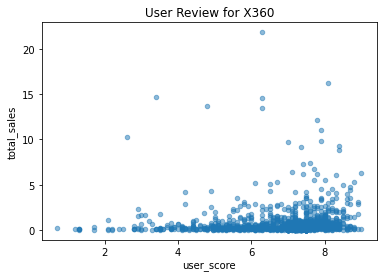

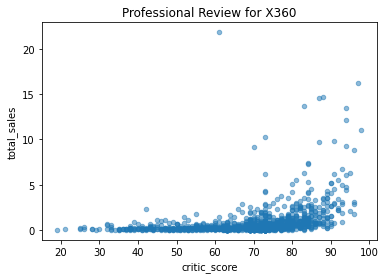

In [52]:
games_clean.query('platform == "X360"').plot(x='user_score', y='total_sales', kind='scatter', title='User Review for X360',alpha=0.5);
games_clean.query('platform == "X360"').plot(x='critic_score', y='total_sales', kind='scatter', title='Professional Review for X360',alpha=0.5);

In [53]:
games_clean.query('platform == "X360"')[['user_score','critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.535224,0.081767
critic_score,0.535224,1.000000,0.367797
total_sales,0.081767,0.367797,1.000000


The correlation between user_score and total_sales is 0.08                                                                      The correlation between critic_score and total_sales is 0.37                                                                    Correlation for does not show a relation for either or.

In [54]:
## the sales of the same games on other platforms.

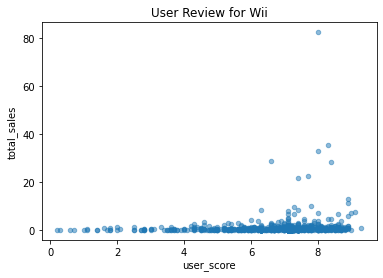

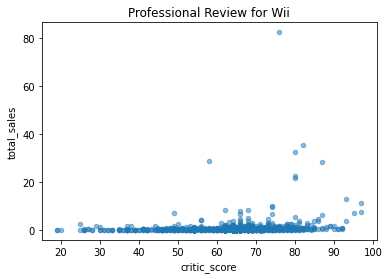

In [55]:
games_clean.query('platform == "Wii"').plot(x='user_score', y='total_sales', kind='scatter', title='User Review for Wii',alpha=0.5);
games_clean.query('platform == "Wii"').plot(x='critic_score', y='total_sales', kind='scatter', title='Professional Review for Wii',alpha=0.5);

In [56]:
games_clean.query('platform == "Wii"')[['user_score','critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.611565,0.088819
critic_score,0.611565,1.000000,0.159419
total_sales,0.088819,0.159419,1.000000


The correlation between user_score and total_sales is 0.09                                                                      The correlation between critic_score and total_sales is 0.15                                                                    Correlation for does not show a relation for either or.

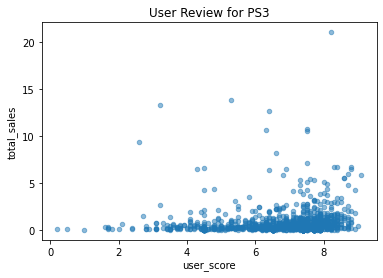

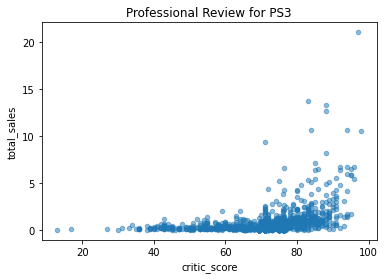

In [57]:
games_clean.query('platform == "PS3"').plot(x='user_score', y='total_sales', kind='scatter', title='User Review for PS3',alpha=0.5);
games_clean.query('platform == "PS3"').plot(x='critic_score', y='total_sales', kind='scatter', title='Professional Review for PS3',alpha=0.5);

In [58]:
games_clean.query('platform == "PS3"')[['user_score','critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.462322,0.085358
critic_score,0.462322,1.000000,0.374838
total_sales,0.085358,0.374838,1.000000


The correlation between user_score and total_sales is 0.09                                                                     The correlation between critic_score and total_sales is 0.37                                                                    Correlation for does not show a relation for either or.

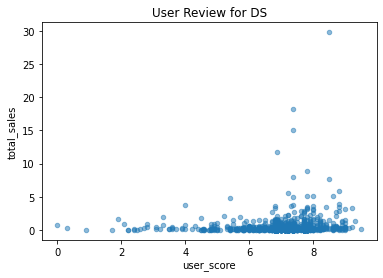

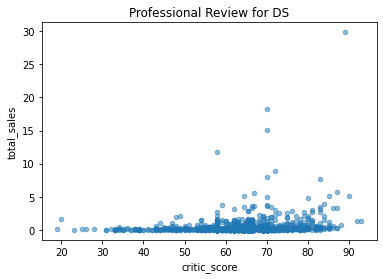

In [59]:
games_clean.query('platform == "DS"').plot(x='user_score', y='total_sales', kind='scatter', title='User Review for DS',alpha=0.5);
games_clean.query('platform == "DS"').plot(x='critic_score', y='total_sales', kind='scatter', title='Professional Review for DS',alpha=0.5);

In [60]:
games_clean.query('platform == "DS"')[['user_score','critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.596748,0.076325
critic_score,0.596748,1.000000,0.163321
total_sales,0.076325,0.163321,1.000000


The correlation between user_score and total_sales is 0.076                                                                     The correlation between critic_score and total_sales is 0.16                                                                   Correlation for does not show a relation for either or.

In [61]:
## general distribution of games by genre

In [62]:
sales_by_genre = games_clean.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', inplace=False).reset_index()
print(sales_by_genre)

           genre  total_sales
0       Strategy        74.69
1         Puzzle        90.63
2      Adventure       141.71
3       Fighting       188.68
4     Simulation       222.27
5       Platform       280.30
6         Racing       301.07
7   Role-Playing       523.49
8           Misc       565.88
9        Shooter       722.92
10        Sports       800.11
11        Action      1135.62


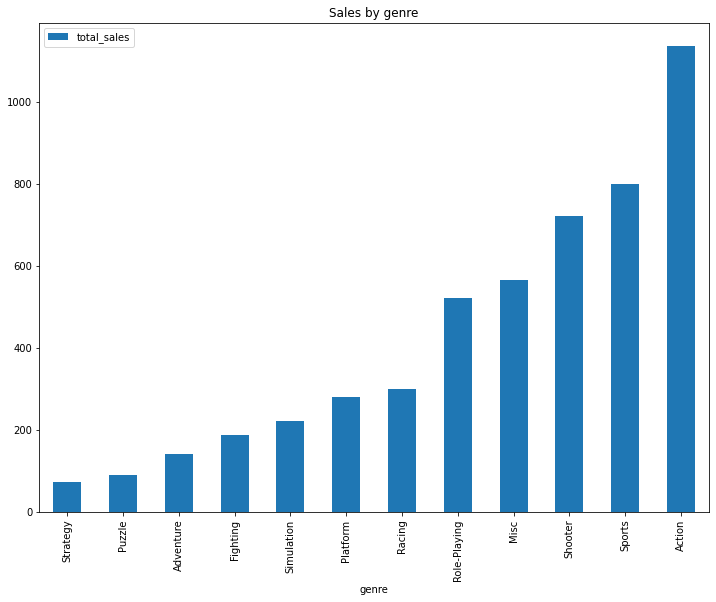

In [63]:
sales_by_genre.plot(x='genre',y='total_sales', figsize=( 12, 9), kind='bar', title='Sales by genre');

The top 3 most popular game genres are Action, Sports, and Shooter.

## Create a user profile for each region

In [64]:
na_region = games_clean.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', inplace=False).reset_index()
print(na_region)
print()

eu_region = games_clean.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', inplace=False).reset_index()
print(eu_region)
print()

jp_region = games_clean.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', inplace=False).reset_index()
print(jp_region)

   platform  na_sales
0        DC      0.00
1       GBA      5.15
2        XB      8.01
3        GC      8.72
4       PSV     12.58
5      WiiU     38.10
6        PC     45.64
7       PSP     82.44
8       3DS     83.49
9      XOne     93.12
10      PS4    108.74
11      PS2    116.26
12       DS    326.08
13      PS3    393.49
14      Wii    496.90
15     X360    595.57

   platform  eu_sales
0        DC      0.00
1       GBA      1.88
2        GC      2.34
3        XB      2.41
4       PSV     13.12
5      WiiU     25.13
6       PS2     46.85
7      XOne     51.59
8       PSP     55.27
9       3DS     61.48
10       PC    102.39
11      PS4    141.09
12       DS    143.47
13      Wii    262.21
14     X360    270.33
15      PS3    330.29

   platform  jp_sales
0        PC      0.00
1        XB      0.00
2        DC      0.06
3        GC      0.21
4      XOne      0.34
5       GBA      1.51
6      X360     12.15
7      WiiU     13.01
8       PS4     15.96
9       PSV     21.91
10      

The top five platforms in NA are X360, Wii, PS3, DS, and PS2 with sales ranging from 108-595 million usd.
The top five platforms in EU are PS3, X360, Wii, DS, and PS4 with sales ranging from 141-330 million usd.
The top five platforms in JP are DS, 3DS, PS3, PSP, and Wii with sales ranging from 69-142 million usd.

In [65]:
na_genre = games_clean.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', inplace=False).reset_index()
print(na_genre)
print()

eu_genre = games_clean.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', inplace=False).reset_index()
print(eu_genre)
print()

jp_genre = games_clean.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', inplace=False).reset_index()
print(jp_genre)

           genre  na_sales
0       Strategy     29.22
1         Puzzle     43.05
2      Adventure     61.81
3       Fighting     94.49
4     Simulation    109.12
5         Racing    133.56
6       Platform    134.33
7   Role-Playing    200.01
8           Misc    291.78
9        Shooter    376.08
10        Sports    400.76
11        Action    540.08

           genre  eu_sales
0       Strategy     24.65
1         Puzzle     27.86
2      Adventure     37.92
3       Fighting     42.68
4     Simulation     69.76
5       Platform     82.10
6   Role-Playing    110.79
7         Racing    114.48
8           Misc    148.85
9        Shooter    241.09
10        Sports    252.69
11        Action    356.98

           genre  jp_sales
0         Puzzle     12.43
1         Racing     13.24
2       Strategy     14.09
3        Shooter     19.43
4     Simulation     23.47
5       Fighting     28.61
6      Adventure     29.55
7       Platform     35.20
8         Sports     49.36
9           Misc     65.62

The top five genres in NA are Action, Sports, Shooter, Misc and Roleplaying with sales ranging from 200-540 million usd.
The top five genres in EU are Action, Sports, Shooter, Misc and Racing with sales ranging from 114-356 million usd.
The top five genres in JP are Roleplaying, Action, Misc, Sports, Platform with sales ranging from 35-170 million usd.

In both genre and platforms, North America sold the most games. Japan came out in the bottom for both platform and genre.
Europe and North America preferred similar games and platforms but Japan had very different outcomes for both genre and platforms.

In [66]:
## ESRB ratings 

In [67]:
na_rating= games_clean.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', inplace=False).reset_index()
print(na_rating)

    rating  na_sales
0       RP      0.00
1       EC      1.32
2  unknown    275.72
3     E10+    323.09
4        T    433.71
5        M    577.64
6        E    802.81


In [68]:
eu_rating= games_clean.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', inplace=False).reset_index()
print(eu_rating)

    rating  eu_sales
0       EC      0.00
1       RP      0.08
2     E10+    178.47
3  unknown    228.01
4        T    239.25
5        M    401.91
6        E    462.13


In [69]:
jp_rating= games_clean.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', inplace=False).reset_index()
print(jp_rating)

    rating  jp_sales
0       EC      0.00
1       RP      0.00
2     E10+     36.57
3        M     44.45
4        T     84.07
5        E    120.46
6  unknown    279.29


In NA ESRB ratings most sold were E, M, T and E10+, sales ranged between 323-802 million usd.
In EU ESRB ratings most sold were E, M, T and E10+, sales ranged between 178-462 million usd.
In JP ESRB ratings most sold were E, T, M and E10+, sales ranged between 36-120 million usd.
Japan barely sold half of what the other regions sold.

I did not count the unknown values because those are missing values in the data.

## Test statistical hypotheses

In [81]:
## Average user ratings of the Xbox One and PC platforms are the same
xbox_plat = games_clean.query('platform =="XOne"')['user_score']
pc_plat= games_clean.query('platform =="PC"')['user_score']

print('mean xbox platform:', pd.Series(xbox_plat).mean())
print('mean pc platform:', pd.Series(pc_plat).mean())

alpha= 0.05

results = st.ttest_ind(xbox_plat, pc_plat)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

mean xbox platform: 6.827935222672065
mean pc platform: 7.028247162673392
p-value:  0.04847516382110007
We reject the null hypothesis


As shown above, we have decided to reject the null hypothesis.  The average user rating for Xbox one and Pc platforms are different.

In [80]:
## Average user ratings for the Action and Sports genres are different.
action_gen = games_clean.query('genre =="Action"')['user_score']
sport_gen= games_clean.query('genre =="Sports"')['user_score']

print('mean action genre:', pd.Series(action_gen).mean())
print('mean sport genre:', pd.Series(sport_gen).mean())


alpha= 0.05

results = st.ttest_ind(action_gen, sport_gen)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

mean action genre: 6.976797520661156
mean sport genre: 6.661613406079502
p-value:  3.325879658416342e-14
We reject the null hypothesis


As shown above, we have decided to reject the null hypothesis.  The average user user rating Action genre games and Sport genre games are different.

## General Conclusion

We were tasked to identify patterns that determine whether a game will be successful or not. The data consisted of 11 columns and 16715 rows. A substantial amount of missing values were found in columns: Name, Year_of_Release, Genre, Critic_score, User_Score and Rating. The missing values in name and genre were then dropped without affecting our data. The rest of the values in columns year_of_release and critic_score were filled by grouping platform and genre which was then used to fill user_score. The user_score column also contained some 'tbd' values which meant the scores were not available when data was extracted. We also made changed the datatype for years_of_release, user_score and critic_score. After analyzing the data we found top popular platform lose their popularity after 8 years. We then decided to pull data that was relevant to our goal. I took data of games released after 2005, 10 years of data is sufficient enough to note the rise and fall of data provided.        The findings on platforms:         
PS2: was popular between 2001-2006. In 2007, sales began to decrease and hitting below 1 sale in 2011 and has not bounce back since then.                                                                                                                                                                                                                                                     X360: popularity began to climb in 2006 and lasted until 2011. In 2012, sales began to decrease with its lowest sale of 1.52 in 2016.
PS3: rose in popularity in 2008-2013. Sales dropped by in 2014.
Wii: was popular in 2006-2010, sales began to dropin 2012 and hit zero sales in 2016.
DS: was a new platform released in the mid 2000's and was popular in 2006-2009. In 2010, popularity dropped and sales dropped to zero in 2014.
PS: one the top sales platform lost popularity well before 2005. The platform was popluar in 1996-1999 and sales began to decrease in 2000.
Finding on genre:
The top 3 most popular game genres are Action, Sports, and Shooter. Least popular was strategy.
We then built a scatterplot and calculated the correlation between reviews (both critic and user) and sales and found there to be no relation.
We then took a look at sales by each region and found there to be similarities in North America and Europe in the genre and platforms they used.I would recommend for Ice to plan on advertising on their most popular genres an platforms for both of these continents. Japanese market was very different when it came to both genres and platforms. They will have to find a different method to appease Japan.
